**Customer Segmentation using K-means Clustering**

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [130]:
df.rename(columns={'Gen':'Gender'},inplace=True)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [131]:
df.shape

(200, 5)

In [132]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [133]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [134]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [135]:
df.drop(["CustomerID"],axis=1, inplace=True)

In [136]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


<ipython-input-137-41f47e36763c>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], bins = 20)
<ipython-input-137-41f47e36763c>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], bins = 20)
<ipython-input-137-41f47e36763c>:7: UserWarning: 

`distplot` is a deprecated function and will 

<function matplotlib.pyplot.show(close=None, block=None)>

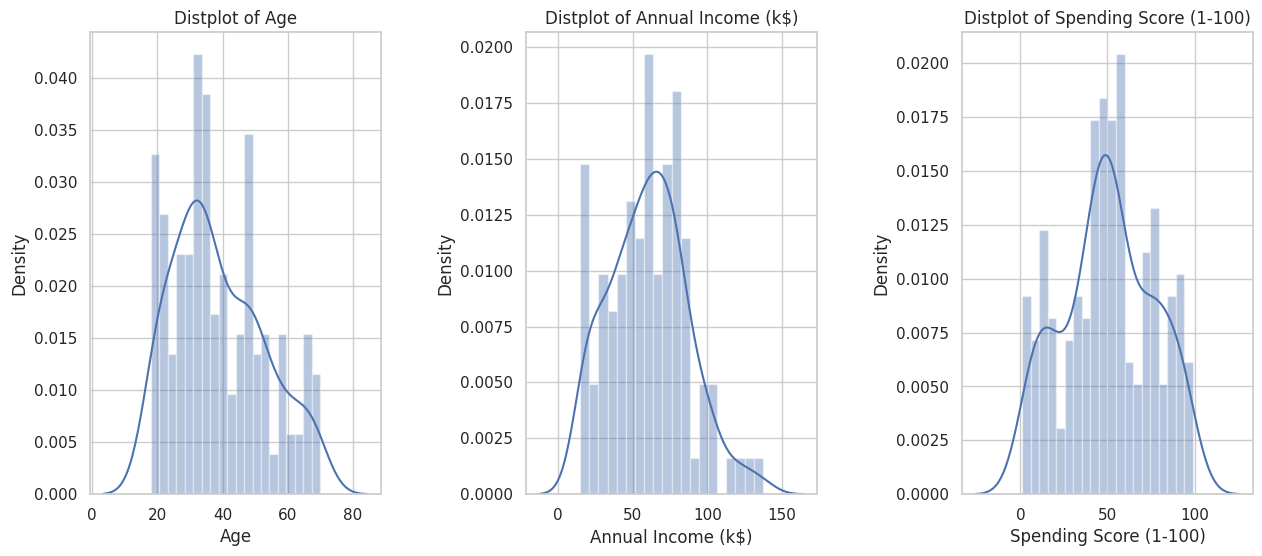

In [137]:
plt.figure(1, figsize=(15,6))
n=0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
  n+= 1
  plt.subplot(1,3,n)
  plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
  sns.distplot(df[x], bins = 20)
  plt.title('Distplot of {}'.format(x))
plt.show

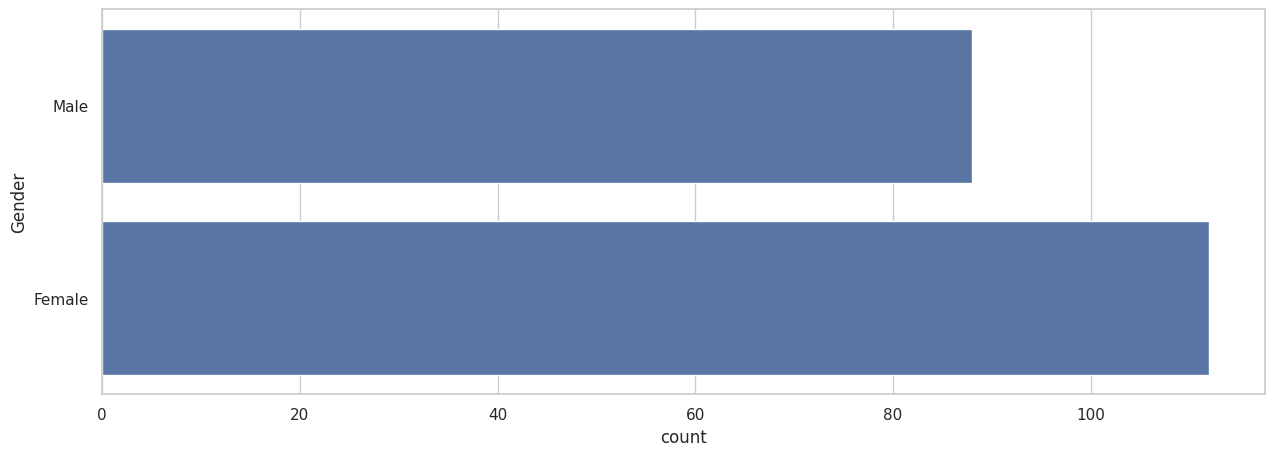

In [138]:
plt.figure(figsize =(15,5))
sns.countplot(y='Gender',data=df)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

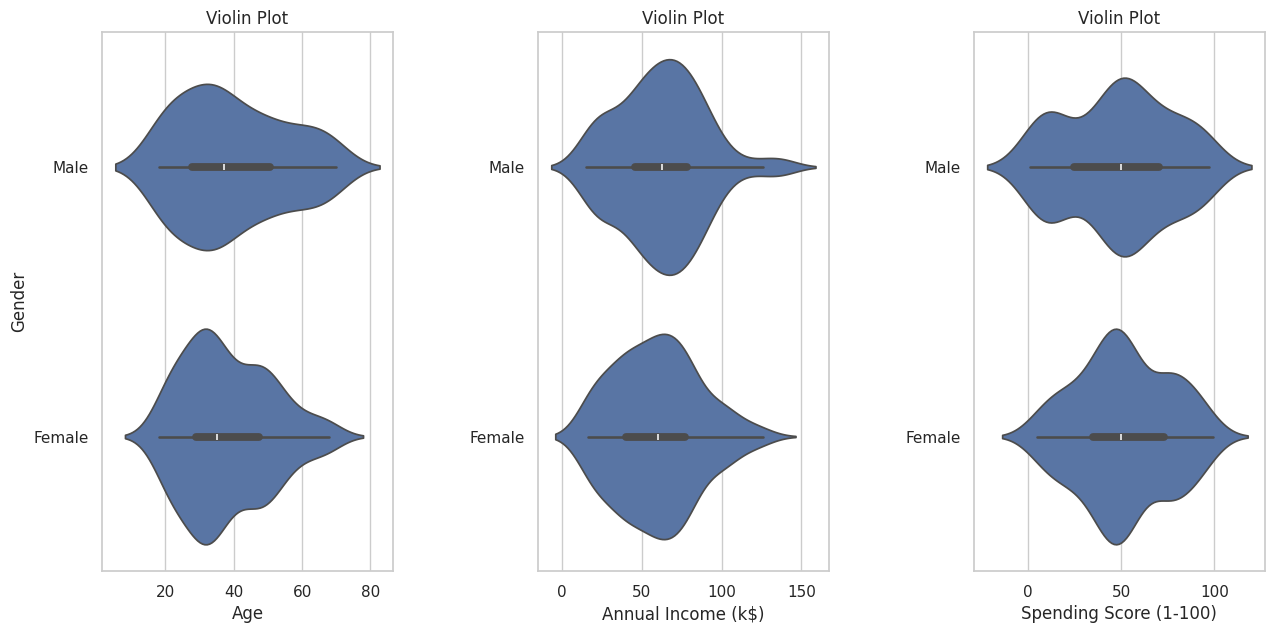

In [139]:
plt.figure(1, figsize=(15,7))
n=0
for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
  n+= 1
  plt.subplot(1,3,n)
  sns.set(style="whitegrid")
  plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
  sns.violinplot(x= cols, y = 'Gender', data = df)
  plt.ylabel('Gender' if n == 1 else '')
  plt.title('Violin Plot')
plt.show

<ipython-input-140-791fd06e4702>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=agex, y=agey, palette="mako")


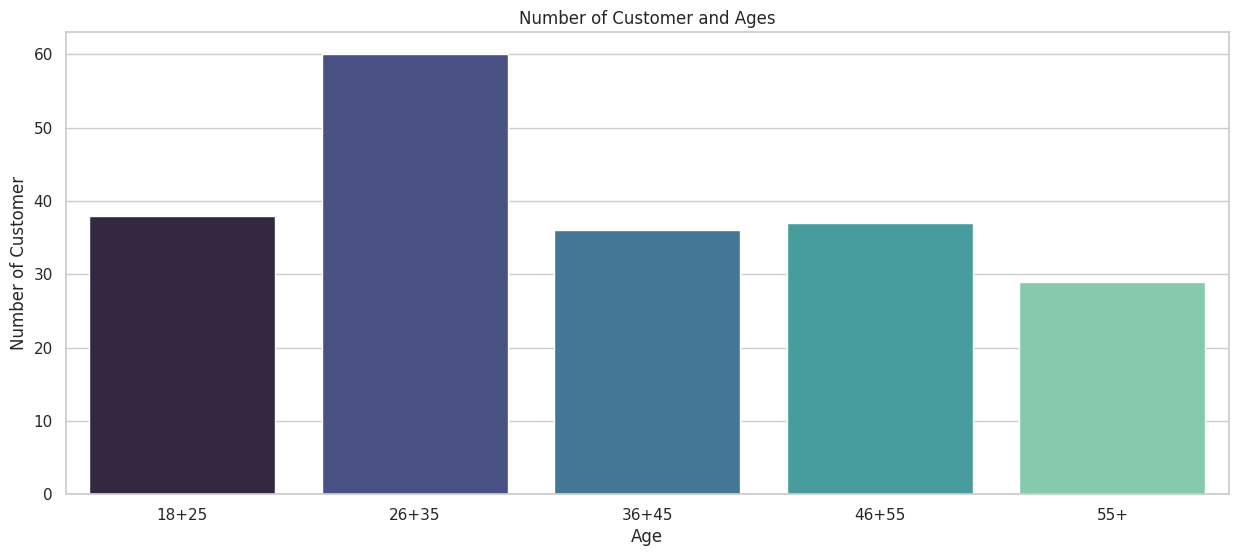

In [140]:
age_18_25 = df.Age[(df.Age >= 18) & (df.Age <=25)]
age_26_35 = df.Age[(df.Age >= 26) & (df.Age <=35)]
age_36_45 = df.Age[(df.Age >= 36) & (df.Age <=45)]
age_46_55 = df.Age[(df.Age >= 46) & (df.Age <=55)]
age_55above = df.Age[(df.Age >= 56)]

agex = ["18+25", "26+35", "36+45", "46+55", "55+"]
agey = [len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=agex, y=agey, palette="mako")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

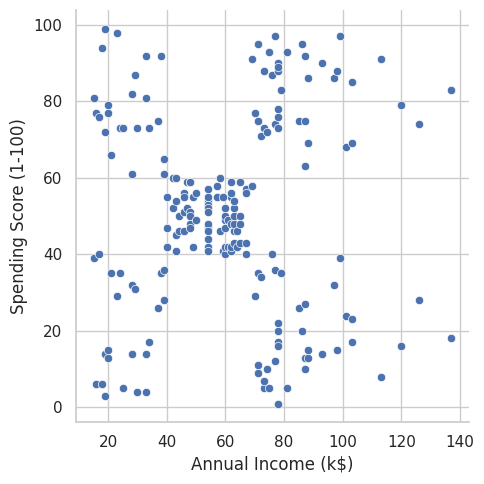

In [141]:
sns.relplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df)

<ipython-input-142-7f2dcc9d9a47>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ssx, y=ssy, palette="rocket")


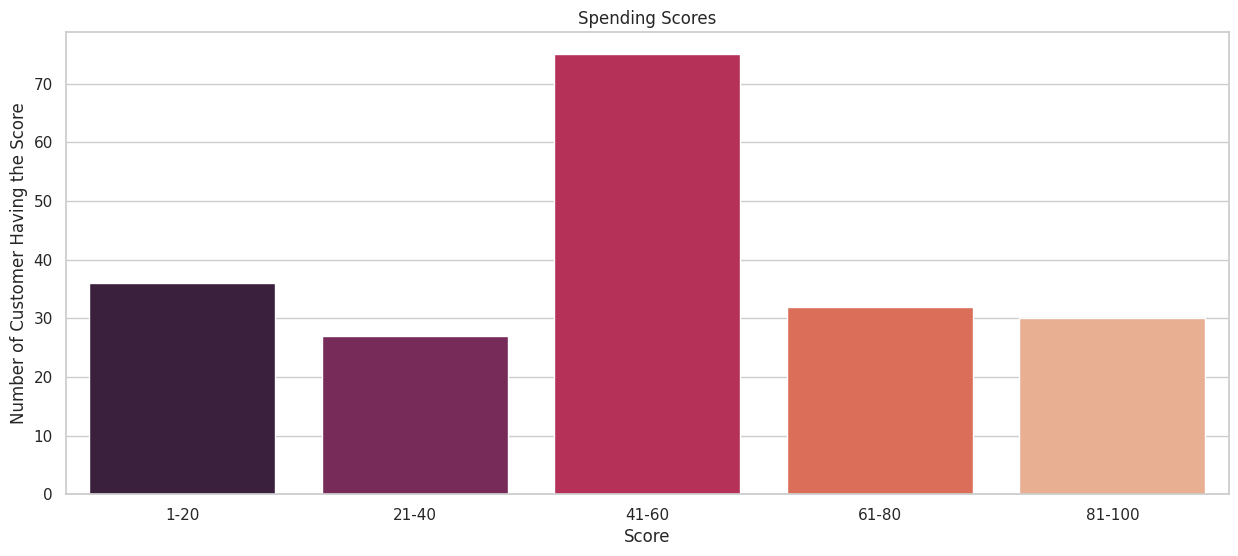

In [142]:
ss_1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>= 1) & (df[ "Spending Score (1-100)"] <= 20)]
ss_21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>= 21) & (df[ "Spending Score (1-100)"] <= 40)]
ss_41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>= 41) & (df[ "Spending Score (1-100)"] <= 60)]
ss_61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>= 61) & (df[ "Spending Score (1-100)"] <= 80)]
ss_81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>= 81) & (df[ "Spending Score (1-100)"] <= 100)]

ssx = ["1-20","21-40", "41-60","61-80", "81-100"]
ssy = [len(ss_1_20.values), len(ss_21_40.values), len(ss_41_60.values), len(ss_61_80.values), len(ss_81_100.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="rocket")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()


<ipython-input-143-e3be83f5c94b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=aix, y=aiy, palette="Spectral")


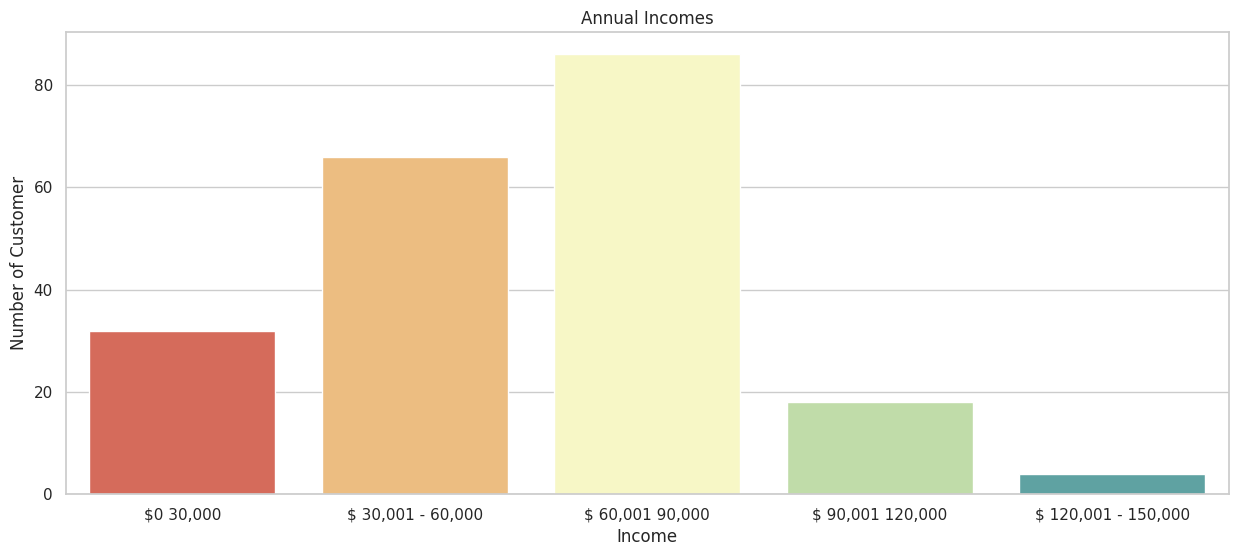

In [143]:
ai0_30 = df["Annual Income (k$)"] [(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"] [(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 =  df["Annual Income (k$)"] [(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 98)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"] [(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]

aix = ["$0 30,000", "$ 30,001 - 60,000", "$ 60,001 90,000", "$ 90,001 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Spectral")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

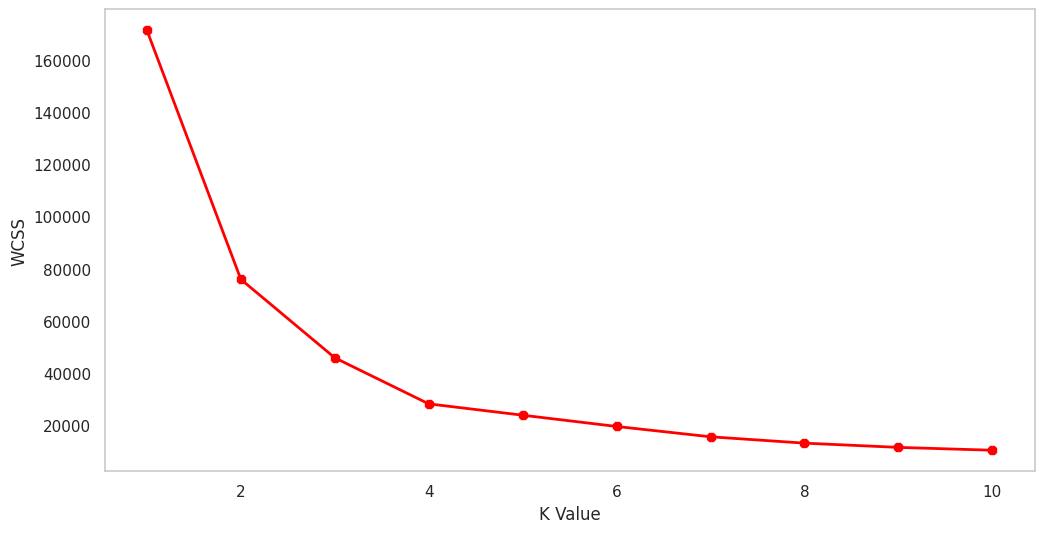

In [144]:
X1 = df.loc[:, ["Age", "Spending Score (1-100)"]].values
from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()


In [145]:
kmeans = KMeans(n_clusters=4)

label = kmeans.fit_predict(X1)

print(label)

[2 1 0 1 2 1 0 1 0 1 0 1 0 1 0 1 2 2 0 1 2 1 0 1 0 1 0 2 0 1 0 1 0 1 0 1 0
 1 0 1 3 1 3 2 0 2 3 2 2 2 3 2 2 3 3 3 3 3 2 3 3 2 3 3 3 2 3 3 2 2 3 3 3 3
 3 2 3 2 2 3 3 2 3 3 2 3 3 2 2 3 3 2 3 2 2 2 3 2 3 2 2 3 3 2 3 2 3 3 3 3 3
 2 2 2 2 2 3 3 3 3 2 2 2 1 2 1 3 1 0 1 0 1 2 1 0 1 0 1 0 1 0 1 2 1 0 1 3 1
 0 1 0 1 0 1 0 1 0 1 0 1 3 1 0 1 0 1 0 1 0 2 0 1 0 1 0 1 0 1 0 1 0 1 0 1 2
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [146]:
print(kmeans.cluster_centers_)

[[43.29166667 15.02083333]
 [30.1754386  82.35087719]
 [27.61702128 49.14893617]
 [55.70833333 48.22916667]]


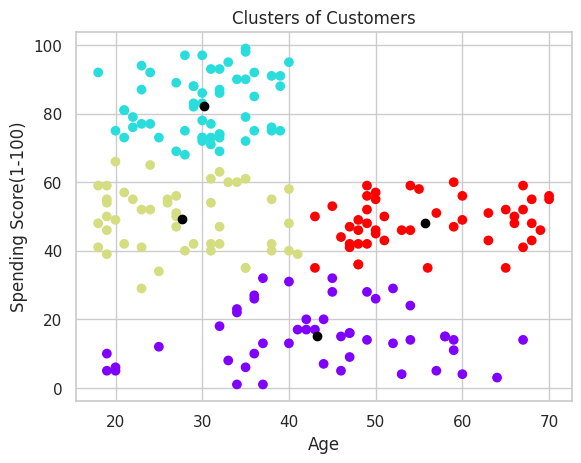

In [147]:
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color='black')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score(1-100)')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

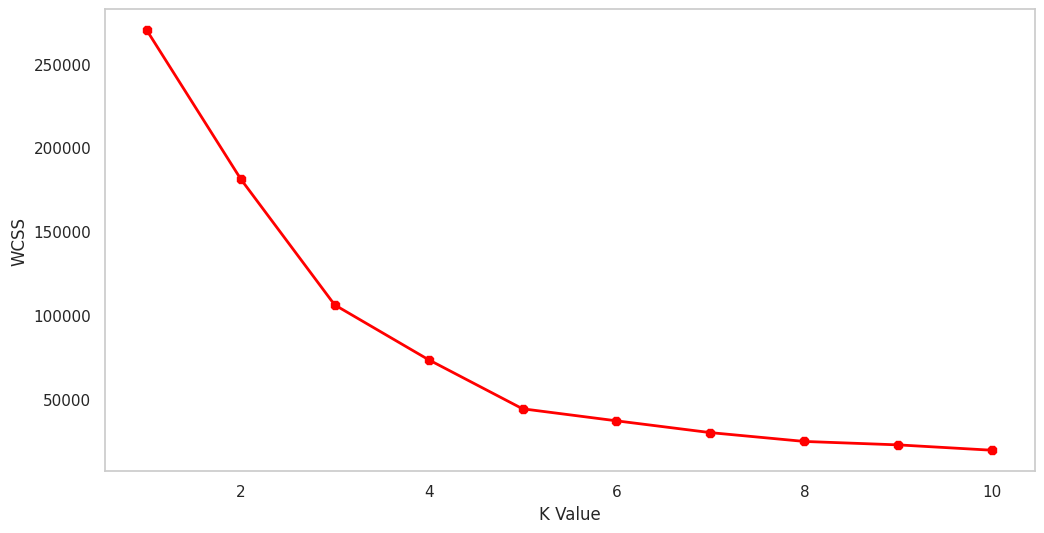

In [148]:
X2 = df.loc[:, ["Annual Income (k$)", "Spending Score (1-100)"]].values
from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()


In [149]:
kmeans = KMeans(n_clusters=5)

label = kmeans.fit_predict(X2)

print(label)

[1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 3 1 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 0 2 0 3 0 2 0 2 0 3 0 2 0 2 0 2 0 2 0 3 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [150]:
print(kmeans.cluster_centers_)

[[86.53846154 82.12820513]
 [26.30434783 20.91304348]
 [88.2        17.11428571]
 [55.2962963  49.51851852]
 [25.72727273 79.36363636]]


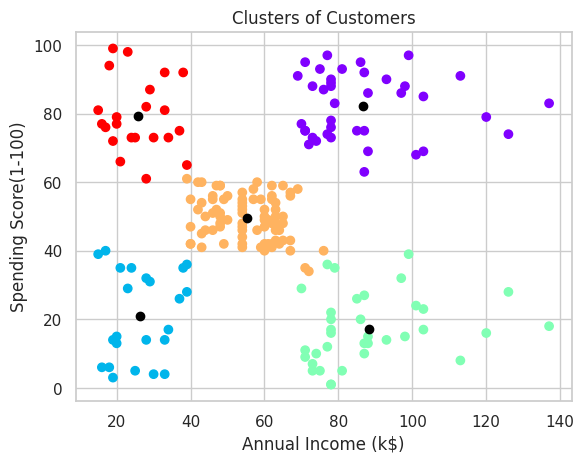

In [151]:
plt.scatter(X2[:,0], X1[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], color='black')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

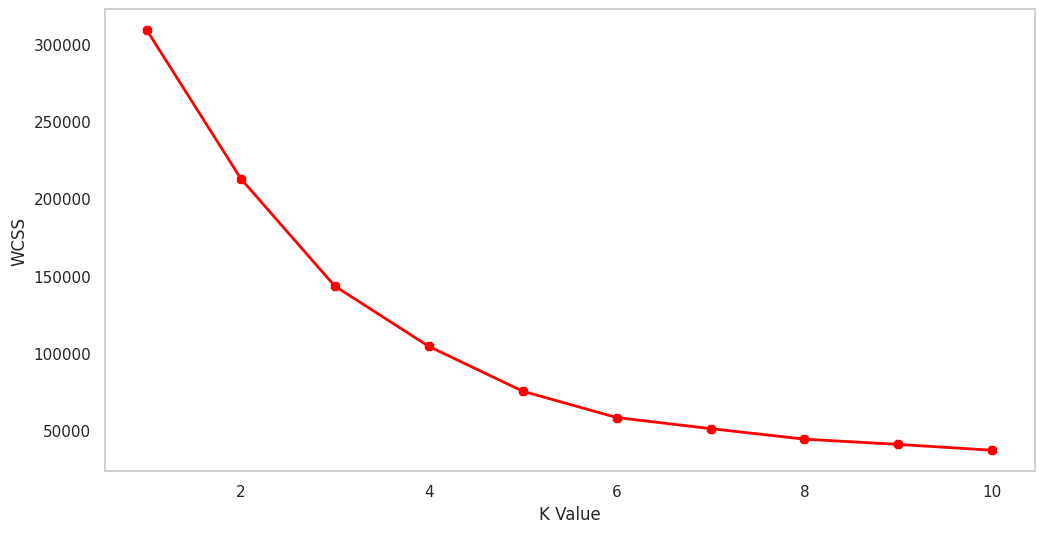

In [153]:
X3 = df.iloc[:,1:]
from sklearn.cluster import KMeans
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12, 6))
plt.grid()
plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()


In [154]:
kmeans = KMeans(n_clusters=5)

label = kmeans.fit_predict(X3)

print(label)

[1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 4 1 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 0 2 0 4 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 4 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [155]:
print(kmeans.cluster_centers_)

[[32.69230769 86.53846154 82.12820513]
 [45.2173913  26.30434783 20.91304348]
 [40.66666667 87.75       17.58333333]
 [25.27272727 25.72727273 79.36363636]
 [42.9375     55.0875     49.7125    ]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


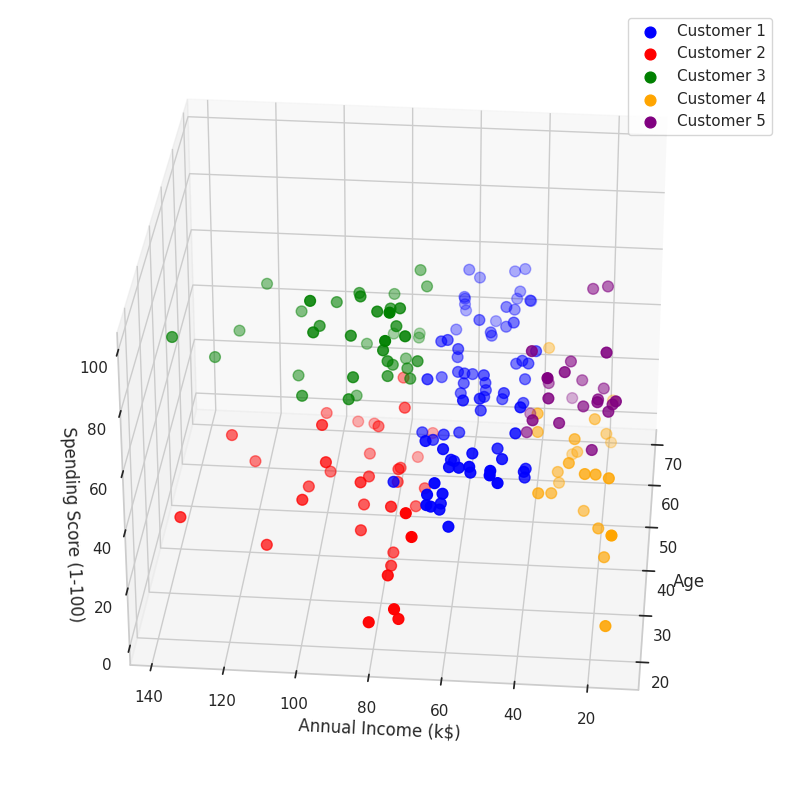

In [156]:
clusters = kmeans.fit_predict(X3)
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')

# Define colors for each customer type
colors = ['blue', 'red', 'green', 'orange', 'purple']

for i in range(len(colors)):
    ax.scatter(df.Age[df.label == i], df["Annual Income (k$)"][df.label == i], df["Spending Score (1-100)"][df.label == i],
               c=colors[i], s=60, label=f'Customer {i+1}')

ax.view_init(30, 185)

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')

plt.legend()
plt.show()
